# Cross Validation

2 1.7352260677333782
3 1.184822633476824
4 1.6242877900671582
5 1.5472183796750294
2 1.4004083511308392
3 1.0656766880731314
4 1.3647798579077233
5 1.4958443698898776


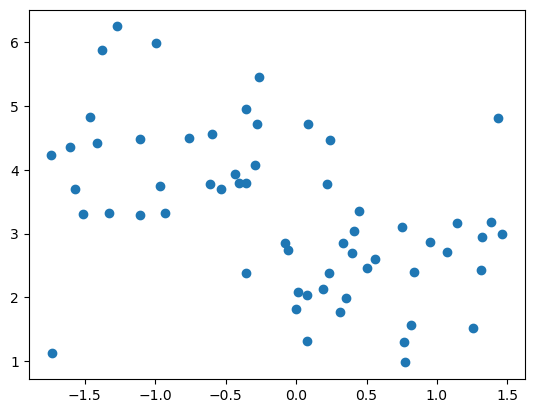

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
n = 60
sigma = 1
beta0, beta1, beta2, beta3 = 3, -2, 0.5, 1
array_beta = np.array([beta1, beta2, beta3])
array_x = np.random.uniform(-1.8, 1.5, n)
list2d_X = []
for x in array_x:
    list2d_X += [[x, x**2, x**3]]
arr2d_X = np.array(list2d_X)
array_f = np.dot(arr2d_X, array_beta) + beta0
array_y = array_f + np.random.normal(0, sigma, n)
plt.scatter(array_x, array_y)




list2d_X = []
for x in array_x:
    list2d_X += [[x, x**2, x**3, x**4, x**5]]
arr2d_X = np.array(list2d_X)




from sklearn.linear_model import LinearRegression
list_trainIndex = [i for i in range(n) if i%2!=0]
list_testIndex = [i for i in range(n) if i%2==0]
for k in [2, 3, 4, 5]:
    reg = LinearRegression()
    reg.fit(arr2d_X[list_trainIndex, 0:k], array_y[list_trainIndex])  
    array_yhat = reg.predict(arr2d_X[list_testIndex, 0:k])    
    loss = sum((array_y[list_testIndex]-array_yhat)**2)/(n/2)
    print(k, loss)




Kfold = 4
for k in [2, 3, 4, 5]:
    reg = LinearRegression()
    list_loss = []
    for amari in range(Kfold):
        list_trainIndex = [i for i in range(n) if i%Kfold!=amari]
        list_testIndex = [i for i in range(n) if i%Kfold==amari]       
        reg.fit(arr2d_X[list_trainIndex, 0:k], array_y[list_trainIndex])
        array_yhat = reg.predict(arr2d_X[list_testIndex, 0:k])
        list_loss += [sum((array_y[list_testIndex]-array_yhat)**2)/(n/Kfold)]
    print(k, np.mean(list_loss))